In [1]:
import numpy as np 
import pandas as pd 
import json
import os
for dirname, _, filenames in os.walk('/kaggle/input/high-quality-invoice-images-for-ocr/batch_1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_3.csv
/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_2/batch1-0664.jpg
/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_3/batch1-1110.jpg
/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_1/batch1-0208.jpg


In [2]:
!pip install -q torch accelerate datasets peft bitsandbytes tensorboard 'transformers>=4.49.0'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 24.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━

In [3]:
csv_file = "/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_2.csv"
df = pd.read_csv(csv_file)
df.head()

,File Name,Json Data,OCRed Text
0,batch1-0500.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Ellis...",Invoice no: 34476404 Date of issue: 07/24/2018...
1,batch1-0501.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Thomp...",Invoice no: 18999056 Date of issue: 07/29/2011...
2,batch1-0502.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Hayne...",Invoice no: 33289699 Date of issue: 12/24/2012...
3,batch1-0503.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Peter...",Invoice no: 22758345 Date of issue: 12/21/2015...
4,batch1-0504.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Bradl...",Invoice no: 79036267 Date of issue: 09/16/2016...


In [4]:
df["Json Data"] = df.apply(lambda x: json.loads(x["Json Data"]), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   File Name   426 non-null    object
 1   Json Data   426 non-null    object
 2   OCRed Text  426 non-null    object
dtypes: object(3)
memory usage: 10.1+ KB


In [5]:
df[df["File Name"]=="batch1-0511.jpg"]["Json Data"].values[0]

{'invoice': {'client_name': 'Hancock-Shields',
  'client_address': '397 Mary Skyway Suite 261\nRochaburgh, SC 53742',
  'seller_name': 'Valdez, Clark and Fischer',
  'seller_address': '4108 Marissa Ports\nNew Andreaborough, MN 20857',
  'invoice_number': '17014325',
  'invoice_date': '03/16/2017',
  'due_date': ''},
 'items': [{'description': 'Nintendo Switch Lite Console -\nGray - with Animal Crossing\nNew Horizons Game',
   'quantity': '2.00',
   'total_price': '682.00'}],
 'subtotal': {'tax': '62.00', 'discount': '', 'total': '682.00'},
 'payment_instructions': {'due_date': '',
  'bank_name': '',
  'account_number': '',
  'payment_method': ''}}

In [6]:
import os
import math
import random
import matplotlib.pyplot as plt
from PIL import Image



def show_random_invoice_images(img_dir, num_images=6, num_cols=3):
    """
    Display a grid of random invoice images from a specified directory.

    Args:
        img_dir (str): Path to the directory containing invoice images.
        num_images (int): Number of random images to display.
        num_cols (int): Number of columns in the display grid.

    Returns:
        None
    """
    # List all image files in the directory
    image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Limit number of images if fewer are available
    num_images = min(num_images, len(image_files))

    # Randomly sample images
    sampled_images = random.sample(image_files, num_images)

    # Calculate rows based on columns
    num_rows = math.ceil(num_images / num_cols)

    # Set plot size
    plt.figure(figsize=(4 * num_cols*2, 4 * num_rows*2))

    for i, img_name in enumerate(sampled_images):
        img_path = os.path.join(img_dir, img_name)
        img = Image.open(img_path)

        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.title(img_name, fontsize=20)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


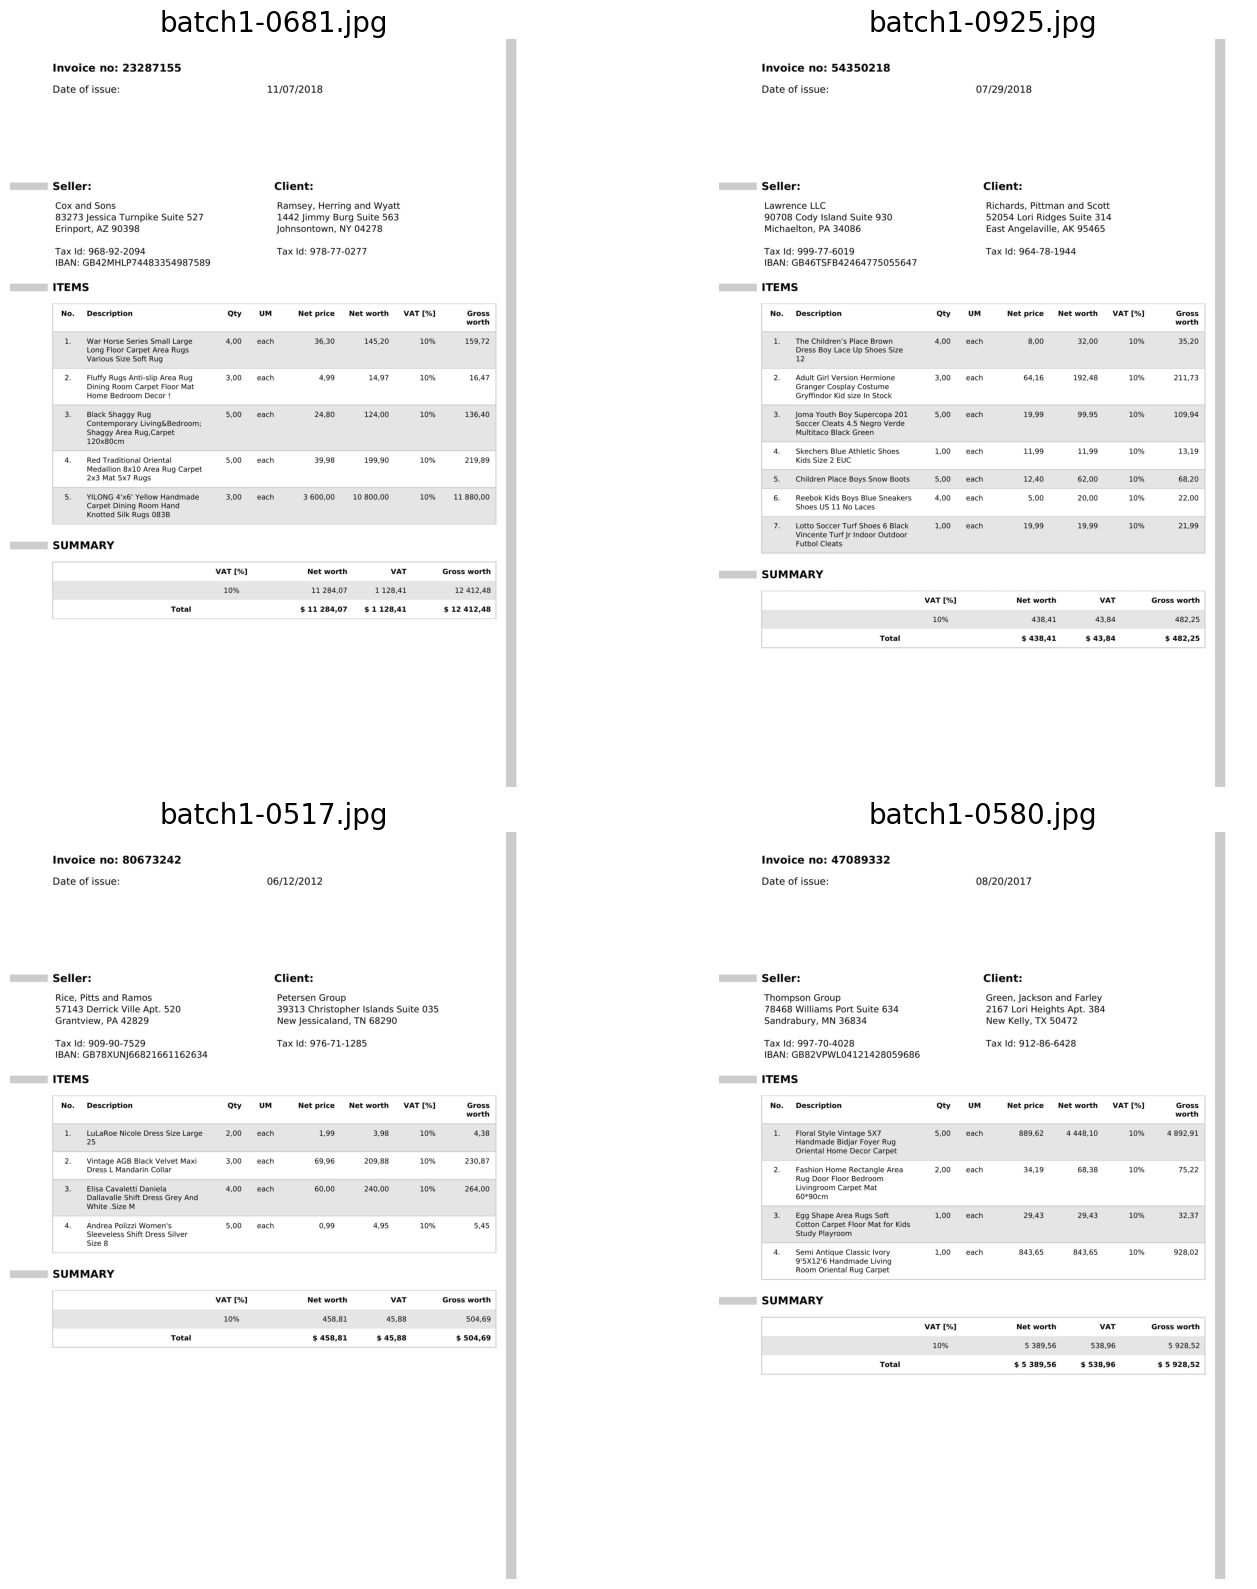

In [9]:
img_dir = '/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_2'
show_random_invoice_images(img_dir, 4, 2)

In [10]:
prompt_invoice = """
You are an intelligent invoice parser. From the provided invoice image, extract the following structured information and return it in valid JSON format.
Follow the descriptions and formatting guidelines for each field exactly.

Field Descriptions and Format Requirements:

invoice_number: A unique identifier for the invoice. Often labeled as "Invoice No.", "Invoice #", or simply "No.". Extract the alphanumeric value exactly.
invoice_date: The date the invoice was issued. Must be in MM/DD/YYYY format. If the original format differs (e.g., DD-MM-YYYY or YYYY/MM/DD), convert it to MM/DD/YYYY.
total: The gross total amount after applying tax and discount. This should reflect the final amount the client has to pay. Maintain the original number formatting (e.g., 8 905,77 or 8,905.77).

items: A list of line items found in the invoice. Each item should include the following keys:
  - description: Description of the item or service.
  - quantity: Quantity of the item or service purchased. Extract as a number.
  - unit_price: Price per single unit of the item or service.
  - total_price: Total price for the item line (quantity × unit_price or listed total).
  Maintain original number formatting for prices (e.g., 1,234.56 or 809,62).

Expected JSON Output Format:

{
  "invoice_number": "",
  "invoice_date": "",
  "total": "",
  "items": [
    {
      "description": "",
      "quantity": "",
      "unit_price": "",
      "total_price": ""
    }
  ]
}

Guidelines:
- If any field is missing or not explicitly mentioned in the text, use an empty string ("") as its value.
- Do not hallucinate.
- For tables with multiple rows of products/services, extract all available line items.
- The line items section may be titled "Items", "Details", or not explicitly labeled — extract regardless of formatting.
"""


In [11]:
from transformers import AutoProcessor, AutoModelForVision2Seq
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(F"Device: {DEVICE}")
processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-Instruct")
model = AutoModelForVision2Seq.from_pretrained("HuggingFaceTB/SmolVLM-Instruct",
                                                torch_dtype=torch.bfloat16,
                                               _attn_implementation= "sdpa").to(DEVICE)
                                                # _attn_implementation="flash_attention_2" if DEVICE == "cuda" else "eager").to(DEVICE)
model

2025-08-06 10:31:15.728832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754476275.888898      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754476275.935082      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Device: cuda


processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

Idefics3ForConditionalGeneration(
  (model): Idefics3Model(
    (vision_model): Idefics3VisionTransformer(
      (embeddings): Idefics3VisionEmbeddings(
        (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
        (position_embedding): Embedding(729, 1152)
      )
      (encoder): Idefics3Encoder(
        (layers): ModuleList(
          (0-26): 27 x Idefics3EncoderLayer(
            (self_attn): Idefics3VisionAttention(
              (k_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (v_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (q_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
            )
            (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
            (mlp): Idefics3VisionMLP(
              (activation_fn): PytorchGELUTanh()
              (fc1): Linear(in_

In [17]:
from PIL import Image
from transformers.image_utils import load_image

# Load images
image = load_image("/kaggle/input/test-data/batch1-0750.jpg")
image2=load_image("/kaggle/input/test-dataset/batch1-1489.jpg")
# Create input messages
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": f"{prompt_invoice}"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image], return_tensors="pt")
inputs = inputs.to(DEVICE)
input_ids_len = inputs["input_ids"].shape[1]
input_ids_len

1662

In [16]:
# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=1000)

#  Slice off the input tokens
new_tokens = generated_ids[0][input_ids_len:]

# Decode only the new/generated tokens
generated_text = processor.tokenizer.decode(new_tokens, skip_special_tokens=True)

print(generated_text.strip())

{
  "invoice_number": "38829380",
  "invoice_date": "12/25/2017",
  "total": "17009.63",
  "items": [
    {
      "description": "48 Inches Marble Dining Table",
      "quantity": "3,00",
      "unit_price": "2,952.00",
      "total_price": "8,856.00"
    },
    {
      "description": "14 Inches Black Marble Coffee Table",
      "quantity": "3,00",
      "unit_price": "225.25",
      "total_price": "6,597.50"
    },
    {
      "description": "12\" White Marble Coffee Table",
      "quantity": "2,00",
      "unit_price": "295.73",
      "total_price": "591.46"
    },
    {
      "description": "12\" Marble Coffee Side Table",
      "quantity": "4,00",
      "unit_price": "248.78",
      "total_price": "995.12"
    },
    {
      "description": "12\"x12\" Wild Agate Stone Side",
      "quantity": "4,00",
      "unit_price": "259.77",
      "total_price": "1,039.08"
    },
    {
      "description": "36 Inches Marble Dining Table",
      "quantity": "1,00",
      "unit_price": "1,874.25"

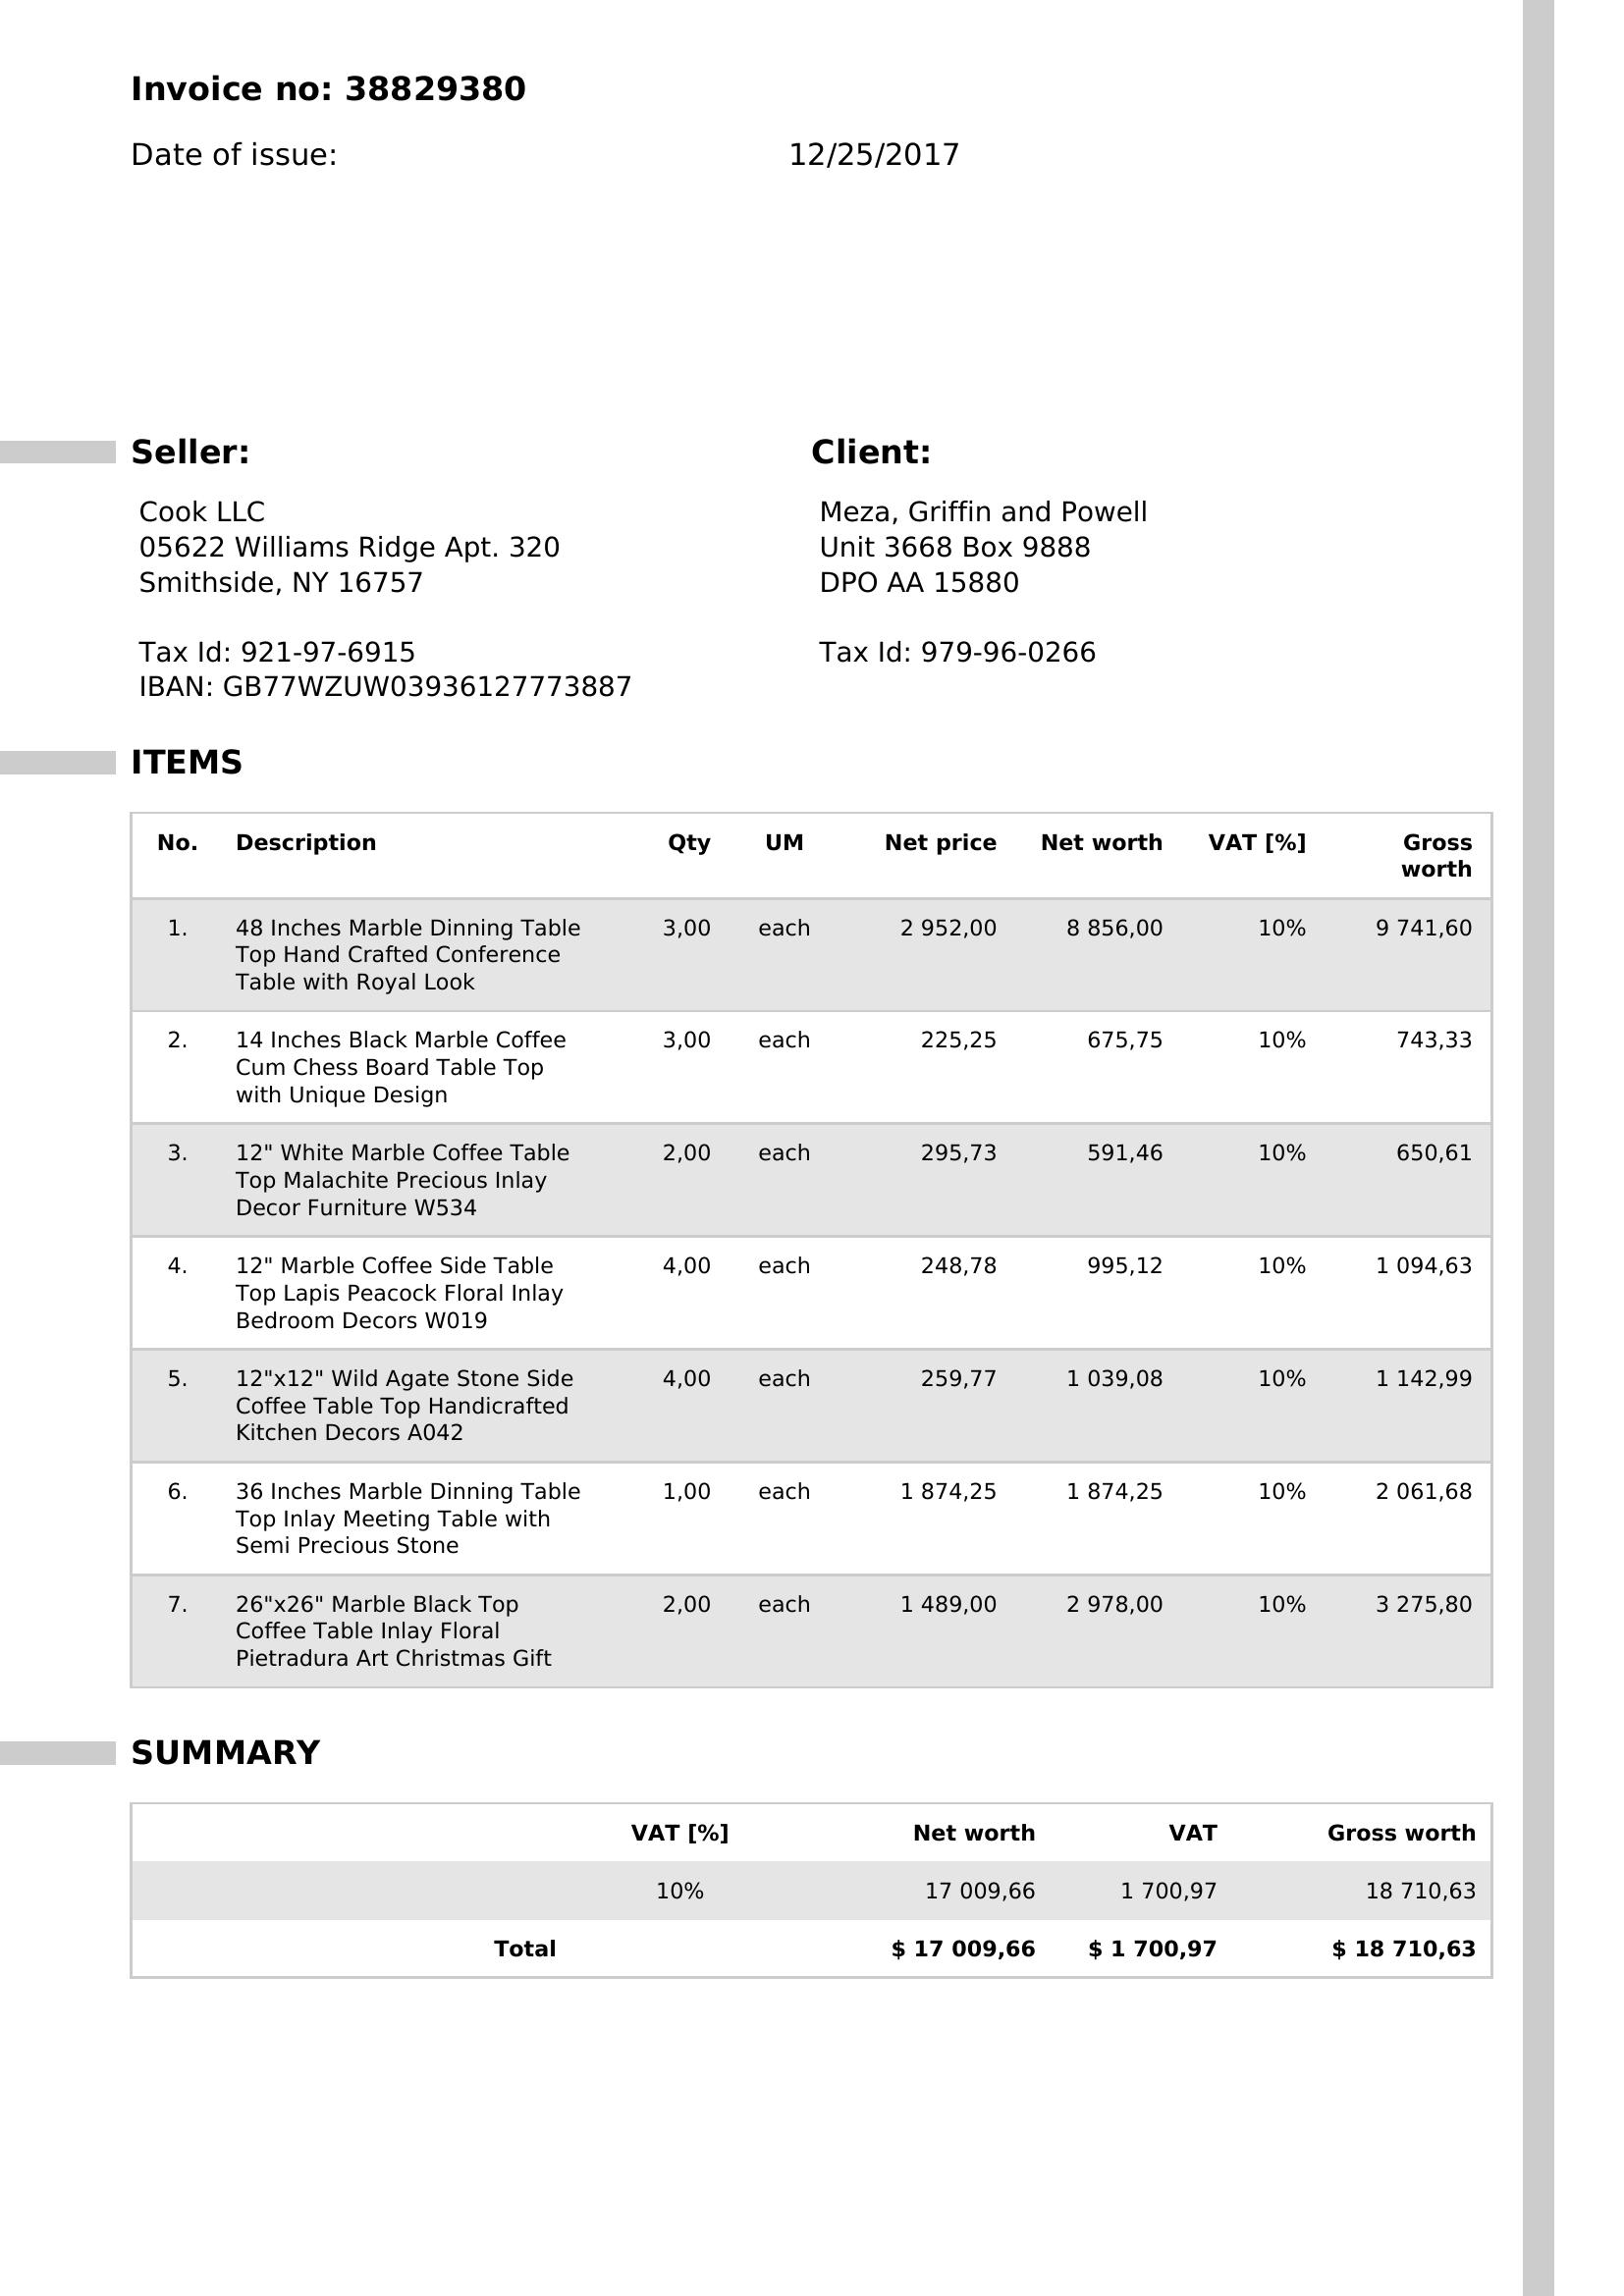

In [15]:
image

**Inference Example**

In [18]:
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image2], return_tensors="pt")
inputs = inputs.to(DEVICE)
input_ids_len = inputs["input_ids"].shape[1]
input_ids_len

1662

In [19]:
# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=1000)

#  Slice off the input tokens
new_tokens = generated_ids[0][input_ids_len:]

# Decode only the new/generated tokens
generated_text = processor.tokenizer.decode(new_tokens, skip_special_tokens=True)

print(generated_text.strip())

{
  "invoice_number": "22862792",
  "invoice_date": "04/19/2013",
  "total": "34 397,78",
  "items": [
    {
      "description": "6'x3' Black Marble Top Dining Table Scagliola Inlay Antique Arts Kitchen Decor",
      "quantity": "3,00",
      "unit_price": "5 265,97",
      "total_price": "15 797,91"
    },
    {
      "description": "36 Inches Marble Dining Table Top Inlay Kitchen Table with Blue Elephant Design",
      "quantity": "1,00",
      "unit_price": "1 515,00",
      "total_price": "1 515,00"
    },
    {
      "description": "24" Marble White Coffee Top Table Inlay Lapis Stone Furniture Indoor Decor W045",
      "quantity": "5,00",
      "unit_price": "918,17",
      "total_price": "4 590,85"
    },
    {
      "description": "25"x25" Marble Black Top custom Table Carnelian Marquetry Art Halloween Gift",
      "quantity": "2,00",
      "unit_price": "2 789,00",
      "total_price": "5 378,00"
    },
    {
      "description": "4Pcs Adjustable Stainless Steel Cabinet Legs K

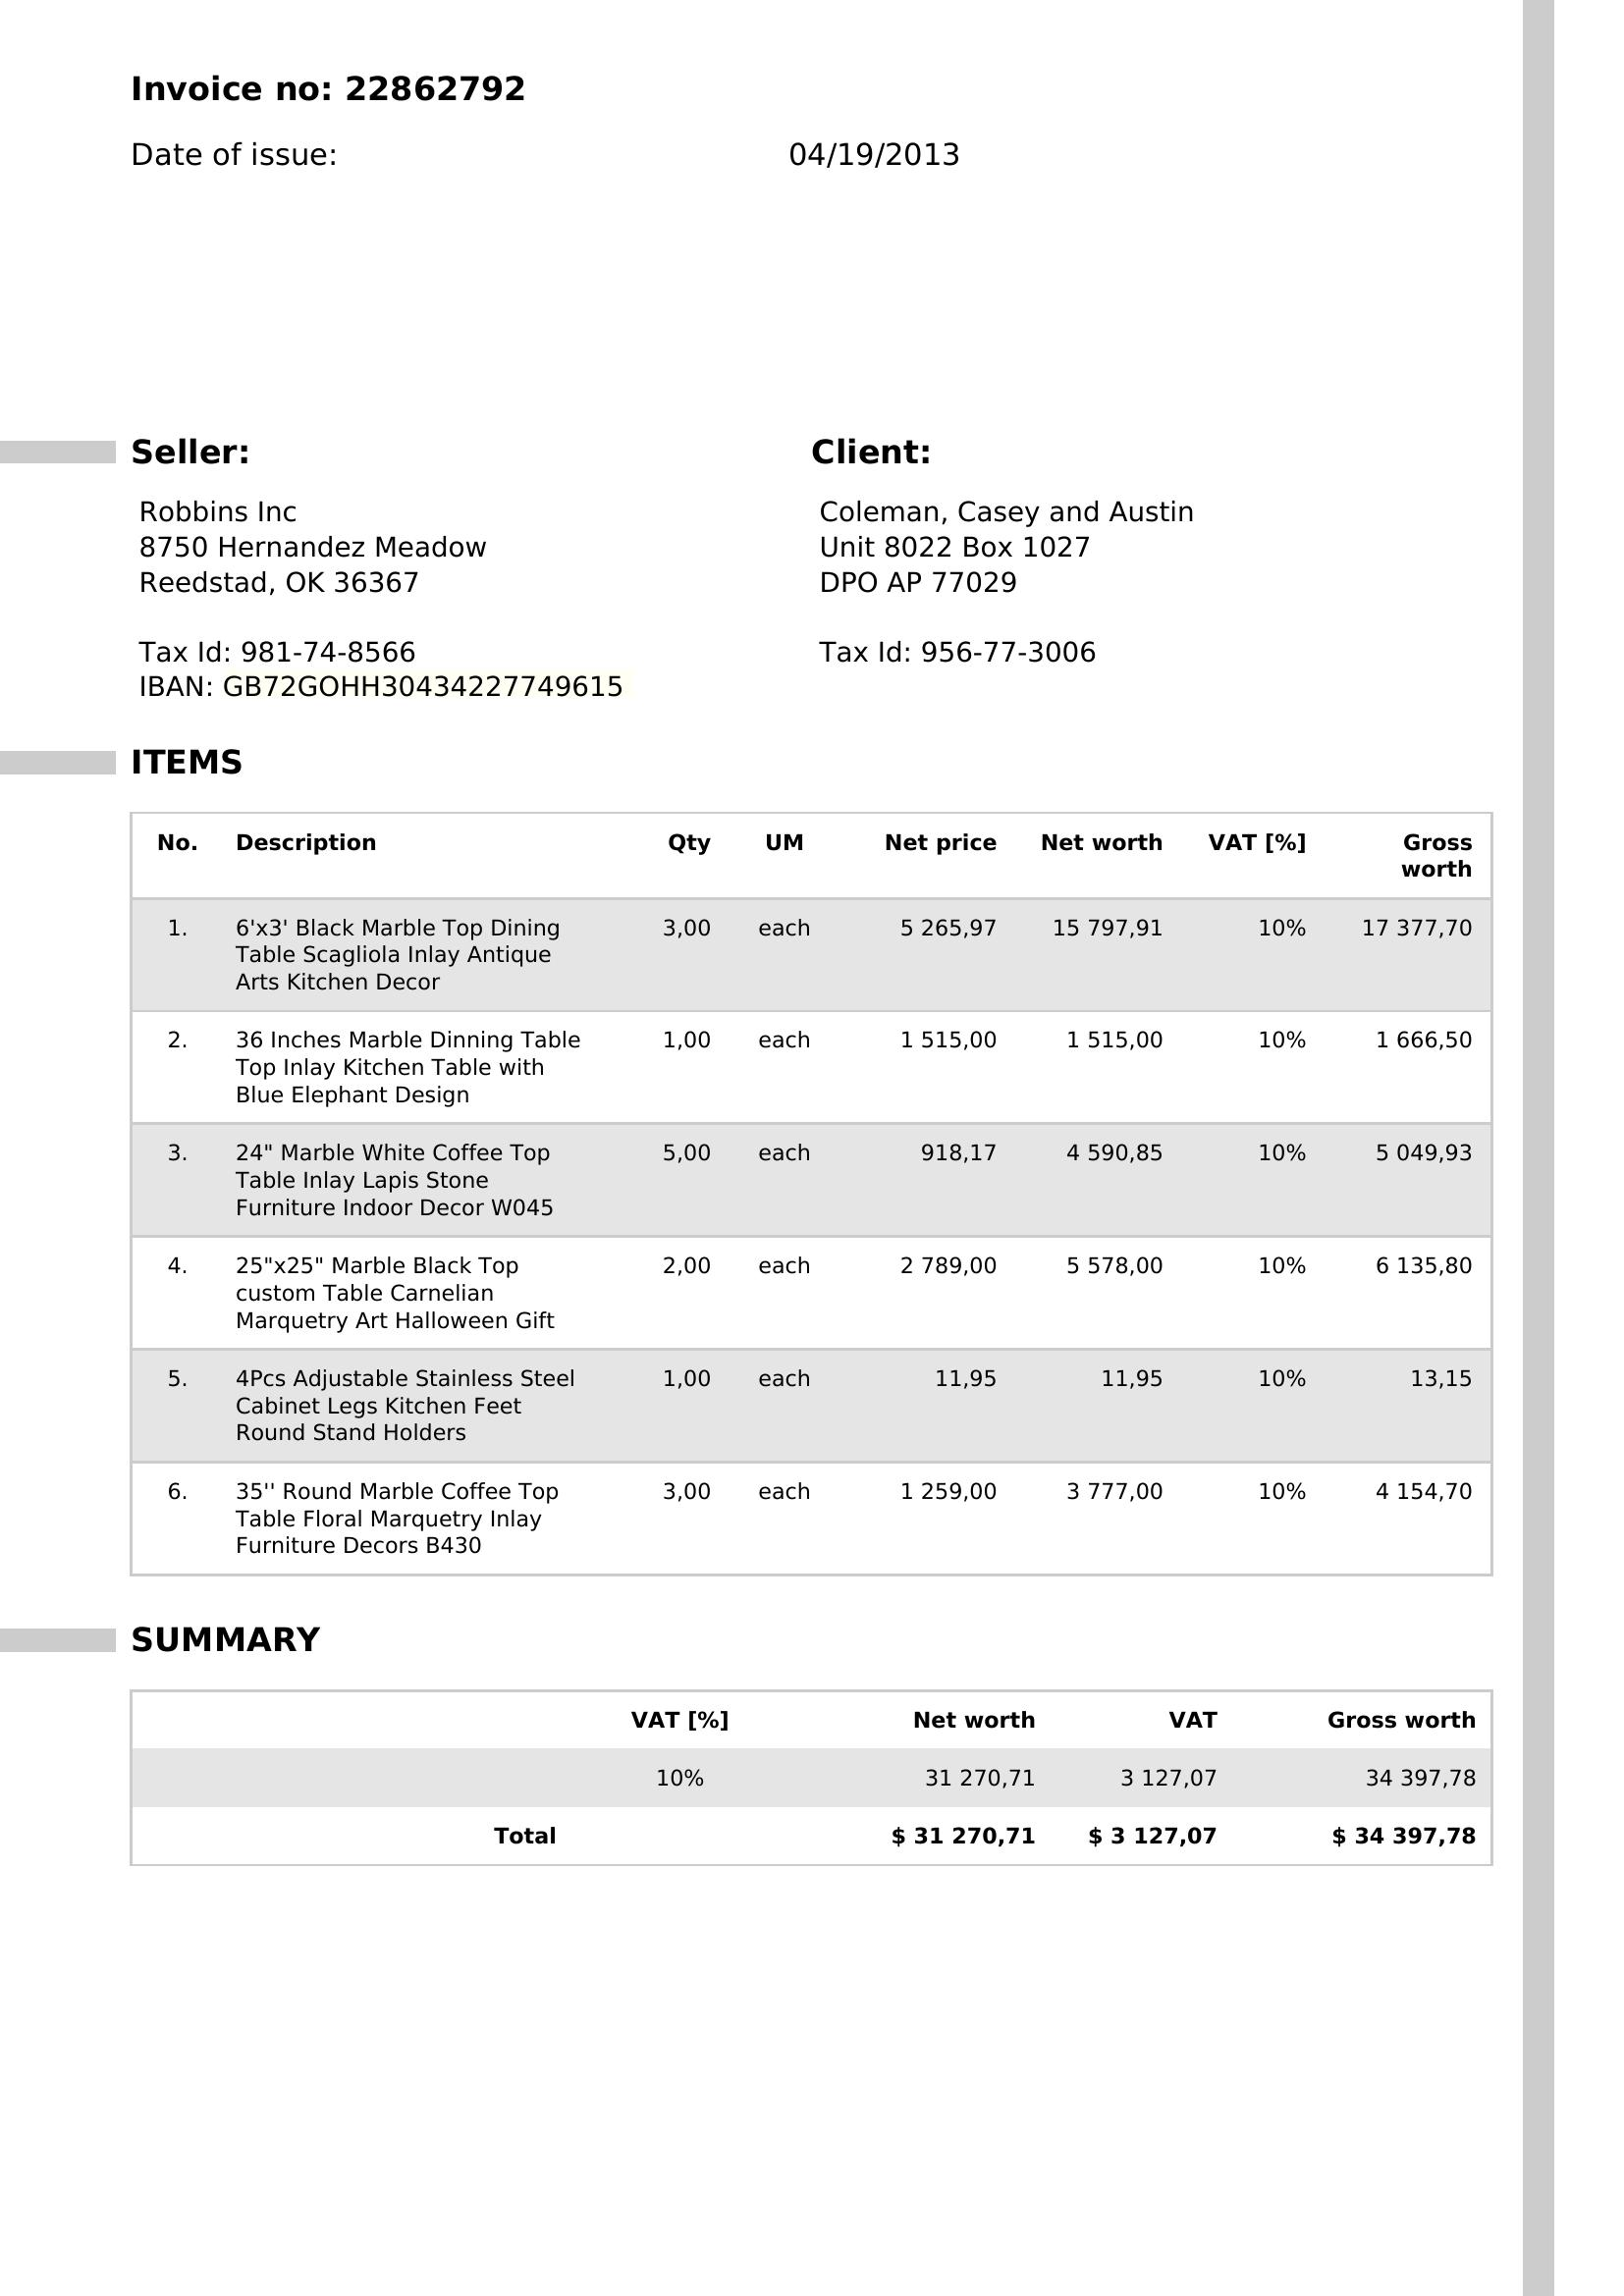

In [20]:
image2